# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dhimas Jatiwibowo
- **Email:** dhimas.jati07@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Berapa perbandingan persentase penyewa registered dan penyewa kasual dari jumlah total Bike Sharing?
- Bagaimana distribusi penyebaran Bike Sharing?
    - Bedasarkan hari
    - Berdasarkan Jam dalam sehari (24 jam)

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat data day.csv menjadi DataFrame.

In [4]:
days_df = pd.read_csv('data/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat data hour.csv menjadi DataFrame.

In [5]:
hours_df = pd.read_csv('data/hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Memeriksa Data Type dan Jumlah data pada kolom dataframe day

In [6]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memastikan tidak ada Missing value pada kolom dataframe days

In [7]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa duplikasi data

In [8]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


memeriksa parameter statistik

In [9]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memeriksa Data Type dan Jumlah data pada kolom dataframe hour

In [10]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memastikan tidak ada Missing value pada kolom dataframe hour

In [11]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa duplikasi data 

In [12]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik

In [13]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday.
- Rename kolom weekday agar mudah dipahami.
- mengubah isi kolom weekday menjadi nama hari.

### Cleaning Data

mengubah tipedata yang semula object menjadi datetime pada kolom dteday

In [14]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

Rename kolom weekday menjadi nameday

In [15]:
days_df.rename(columns={"weekday": "nameday"}, inplace=True)
hours_df.rename(columns={"weekday": "nameday"}, inplace=True)

konversi isi kolom nameday

In [16]:
days_df.nameday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hours_df.nameday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

C:\Users\Dimas\AppData\Local\Temp\ipykernel_10404\3063000842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days_df.nameday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
C:\Users\Dimas\AppData\Local\Temp\ipykernel_10404\3063000842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inter

menggubah tipedata nameday

In [17]:
days_df['nameday'] = days_df['nameday'].astype("category")
hours_df['nameday'] = hours_df['nameday'].astype("category")

## Exploratory Data Analysis (EDA)

### Explore Data days_df

In [18]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,nameday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,NaN,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,NaN,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,NaN,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik di atas, di peroleh informasi bahwa jumlah minimal dan maksimal penyewaan dalam sehari adalah 22 dan 8714

##### Melihat informasi jumlah data penyewa registered dan casual, serta total seluruh pengguna

In [19]:
days_df[["casual", "registered", "cnt"]].sum()

casual         620017
registered    2672662
cnt           3292679
dtype: int64

##### Membuat pivot table jenis dan jumlah penyewa berdasarkan tahun

In [20]:
days_df.groupby(["yr"]).agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


##### Membuat pivot table jenis dan jumlah penyewa berdasarkan hari dalam periode tersebut

In [21]:
days_df.groupby(["yr", "nameday"]).agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)

C:\Users\Dimas\AppData\Local\Temp\ipykernel_10404\3080624250.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(["yr", "nameday"]).agg(


casual  registered     cnt
yr nameday                              
0  Friday      29453      152553  182006
   Monday      31560      148661  180221
   Saturday    59547      120196  179743
   Sunday      59603      117471  177074
   Thursday    22440      152112  174552
   Tuesday     23989      156349  180338
   Wednesday   20660      148509  169169
1  Friday      48785      256999  305784
   Monday      39224      236058  275282
   Saturday    94305      203759  298064
   Sunday      80918      186035  266953
   Thursday    39020      271823  310843
   Tuesday     33854      254917  288771
   Wednesday   36659      267220  303879

### Explore Data hours_df

In [22]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,nameday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,NaN,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,NaN,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,NaN,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,NaN,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,NaN,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Membuat pivot table jenis dan jumlah penyewa berdasarkan jam dalam sehari berdasarkan periode tersebut

In [23]:
hours_df.groupby(["yr", "hr"]).agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)

casual  registered     cnt
yr hr                            
0  0     3423       12117   15540
   1     2071        7487    9558
   2     1570        5091    6661
   3      954        2487    3441
   4      431        1386    1817
   5      428        4729    5157
   6     1377       19424   20801
   7     3768       53162   56930
   8     6969       88498   95467
   9     8864       50622   59486
   10   13065       34446   47511
   11   16582       40016   56598
   12   19006       50192   69198
   13   20152       49187   69339
   14   21097       45385   66482
   15   20863       47727   68590
   16   20739       64883   85622
   17   21473      106159  127632
   18   18066       98919  116985
   19   14525       71277   85802
   20   10960       51858   62818
   21    8845       40030   48875
   22    7031       30646   37677
   23    4993       20123   25116
1  0     3952       19638   23590
   1     2638       11968   14606
   2     1842        7849    9691
   3      939        3794    4733
   4      443        2168    2611
   5      584        8520    9104
   6     1640       32691   34331
   7     4269       92972   97241
   8     8792      156742  165534
   9    13594       86358   99952
   10   20724       58022   78746
   11   26704       68018   94722
   12   30712       84504  115216
   13   32561       83019  115580
   14   33992       75178  109170
   15   33743       80816  114559
   16   33095      109031  142126
   17   32747      176481  209228
   18   26430      166357  192787
   19   20980      120007  140987
   20   15418       86314  101732
   21   11725       64845   76570
   22    9169       48766   57935
   23    6072       32753   38825

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa perbandingan persentase penyewa registered dan penyewa kasual dari jumlah total Bike Sharing?

ValueError: Invalid RGBA argument: '0000FF#'

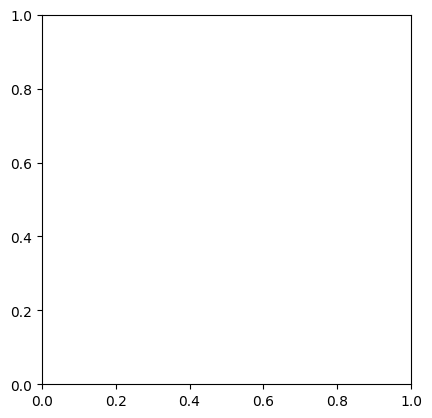

In [24]:
casual = sum(days_df['casual'])
registered = sum(days_df['registered'])

data = [casual, registered]
labels = ['Casual', 'Registered']

plt.pie(x=data, labels=labels, autopct='%1.1f%%', colors=["0000FF#", "#E67F0D"])
plt.show()

# Pertanyaan 2: Bagaimana distribusi penyebaran Bike Sharing?

### Bedasarkan hari

C:\Users\Dimas\AppData\Local\Temp\ipykernel_3000\3572623130.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  oneweek_df = days_df.groupby("nameday").agg({"casual": "sum", "registered": "sum"})


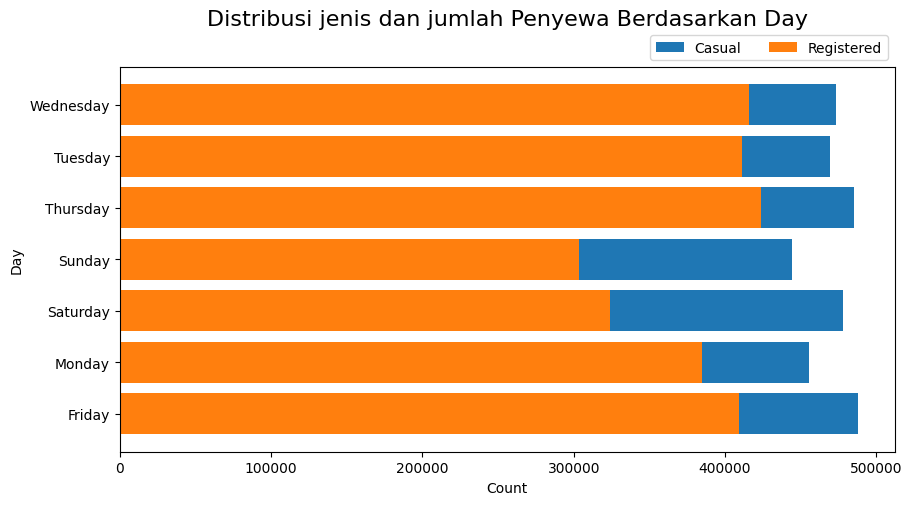

In [ ]:
oneweek_df = days_df.groupby("nameday").agg({"casual": "sum", "registered": "sum"})
oneweek_df.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
plt.barh(
    oneweek_df["nameday"],
    oneweek_df["casual"],
    left=oneweek_df["registered"],
    label="Casual",
)
plt.barh(oneweek_df["nameday"], oneweek_df["registered"], label="Registered")

plt.title("Distribusi jenis dan jumlah Penyewa Berdasarkan Day", pad=30, fontsize=16)
plt.ylabel("Day")
plt.xlabel("Count")
plt.legend(bbox_to_anchor=(1, 1.1), ncol=2)
plt.show()

### Berdasarkan Jam dalam sehari (24 jam)

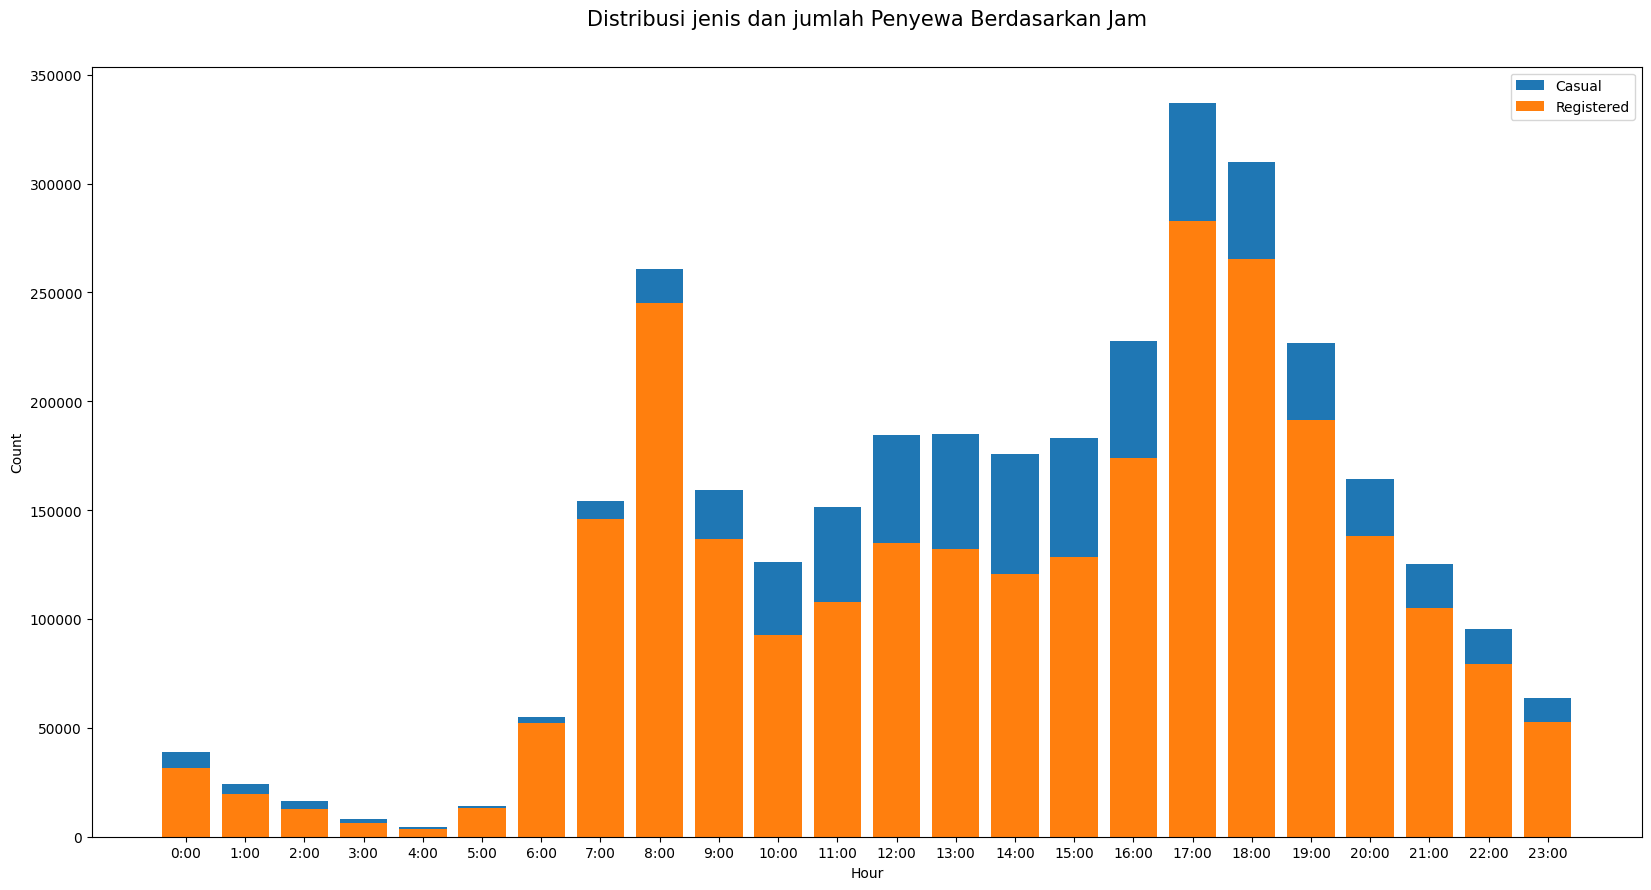

In [ ]:
oneday_df = hours_df.groupby("hr").agg({"casual": "sum", "registered": "sum"}).reset_index()

plt.figure(figsize=(20, 10))
plt.bar(
    oneday_df["hr"],
    oneday_df["casual"],
    bottom=oneday_df["registered"],
    label="Casual",
)
plt.bar(
    oneday_df["hr"], 
    oneday_df["registered"], 
    label="Registered"
)

plt.title("Distribusi jenis dan jumlah Penyewa Berdasarkan Jam", fontsize=15, pad=30)
plt.ylabel("Count")
plt.xlabel("Hour")
plt.xticks(oneday_df["hr"], [f"{time}:00" for time in oneday_df["hr"]])
plt.legend()
plt.show()
     

## Analisis Lanjutan 

### RFM

In [25]:
rfm_df = days_df.groupby(by="nameday", as_index=False).agg({
    "dteday": "max",
    "instant": "nunique",
    "cnt": "sum" 
})

rfm_df.columns = ["nameday", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = hours_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

C:\Users\Dimas\AppData\Local\Temp\ipykernel_10404\2936128558.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_df = days_df.groupby(by="nameday", as_index=False).agg({


,nameday,frequency,monetary,recency
0,Friday,104,487790,3
1,Monday,105,455503,0
2,Saturday,105,477807,2
3,Sunday,105,444027,1
4,Thursday,104,485395,4
5,Tuesday,104,469109,6
6,Wednesday,104,473048,5


C:\Users\Dimas\AppData\Local\Temp\ipykernel_3000\410435429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="nameday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Dimas\AppData\Local\Temp\ipykernel_3000\410435429.py:5: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="recency", x="nameday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Dimas\AppData\Local\Temp\ipykernel_3000\410435429.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="nameday", data=rfm_df

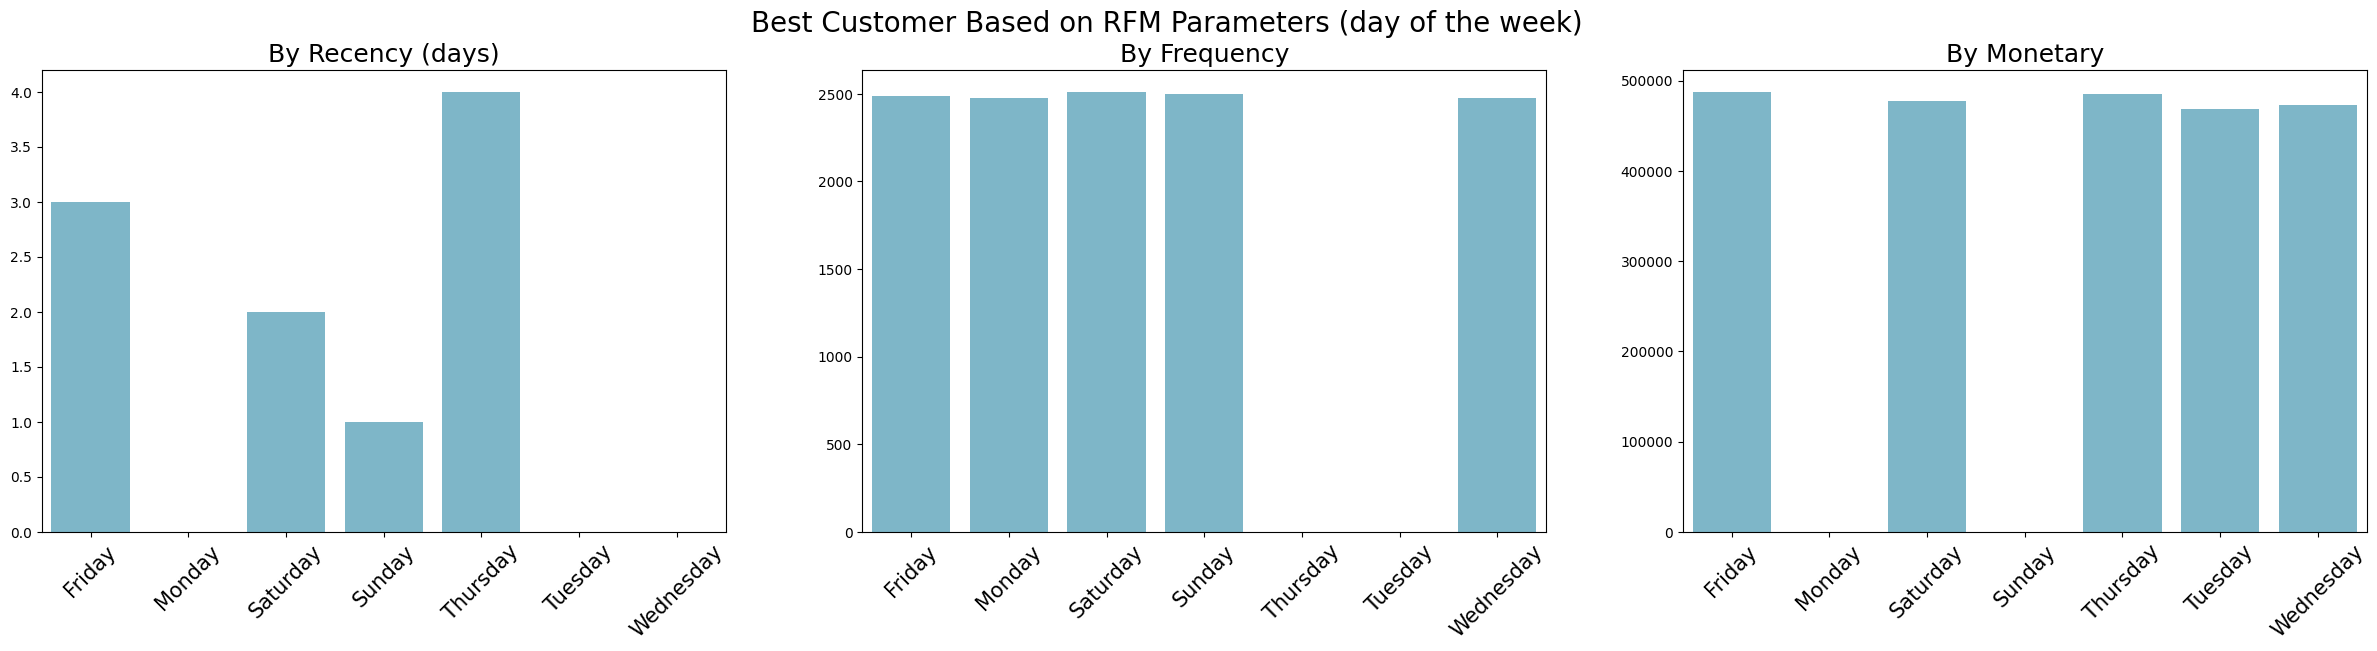

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="nameday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=45)
 
sns.barplot(y="frequency", x="nameday", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)
 
sns.barplot(y="monetary", x="nameday", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (day of the week)", fontsize=20)
plt.show()

## Conclusion

- Berdasarkan Visualisai diagram, persentase jumlah penyewa registered yaitu sebesar 81.2% dibanding dengan penyewa casual sebesar 18.8% dari jumlah seluruh Bike Sharing
- Dari visualisasi Diagram dapat di lihat distribusi penyebaran Bike Sharing?
    - berdasarkan day bar menunjukan jumlah tertinggi berada pada *Friday* dan di ikuti oleh *thursday* yang tidak terlalu signifikan dengan jumlah terendah yaitu *sunday*
    - berdasarkan Hours menunjukan jumlah terbesar berada pada jam 17:00 di ikuti pada jam 07:00

In [ ]:
days_df.to_csv("days.csv", index=False)

In [ ]:
hours_df.to_csv("hours.csv", index=False)